# SNA PROJECT REPORT
Group 10: Alessandro Ivashkevich, Mohamed Ali Ben Belhassen, Lorenzo Ciampana, Gabriel Stanziola

# WEEK 1

### INTRODUCTION
In the first week, we were supposed to choose a network and implement it properly in python, computing some basic but essential features of it in order to have a starting overview of the network. Having drawn a subgraph, and computed the number of nodes/edges, the average degree and the density will make our work suitable also in the next weeks' tasks to compute more complex formulas.

### PROCESS
• TASK A: 

We decided to pick the Facebook ego network, which is an undirected and unweighted network where links represent connections between users. The main informations about this network will be extracted in the next lines of code. 


• TASK B: 

We implemented the graph in python by iterating over the lines of the dataset Facebook-ego.txt and creating a list of tuples for each couple of friendships.

In [24]:
import random # random generator
import networkx as nx # network 
import matplotlib.pyplot as plt # drawing
import numpy as np # Matrices

In [25]:
dataset = open('Facebook-ego/facebook_edges.txt','r')
graph = {}
list_edges = [] 
for line in dataset:
    n1,n2 = line.split(" ")
    list_edges.append((int(n1),int(n2)))


Then we have created the graph by using the following NetworkX function. The graph organises and gives meaning to every edge. 

In [26]:
graph=nx.from_edgelist(list_edges)  
print (graph)

Graph with 4039 nodes and 88234 edges


We are in front of a huge graph: many nodes with much many edges. In order to have a cleanest vision of the network, is opportune to pick an appropriate subgraph.

-	TASK C:


There are several ways to choose a subgraph. The subnetwork which we are looking for is one where we can achieve better performances and more explainable results. It should be relatively small, but at the same it must not loose general features of the main graph. 

We chose to start drawing a subgraph starting by one of the last nodes: 4023. Observing to the raw data, we have noticed that those nodes were the ones with less edges. This allows us to have a better visualization of the subgraph when we use the apposite command nx.draw(g) and get better interpretations of our results. To do that we have used some NetowrkX functions.
The subgraph starts from the node n ( =4023th node) and takes in consideration all the nodes connected to it up to the 2 level of connection. 


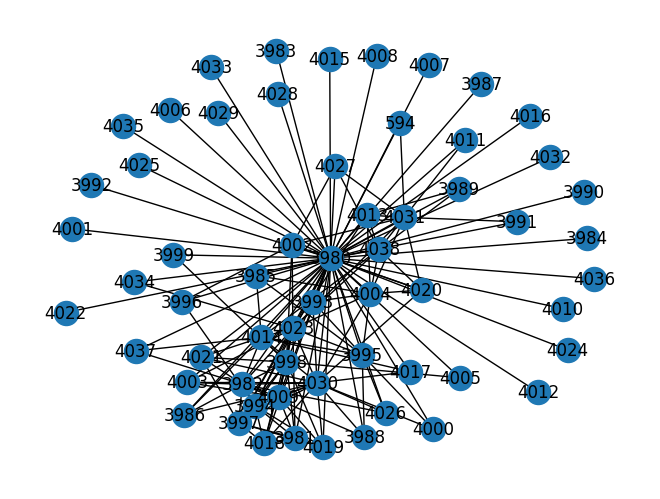

In [27]:
n = 4023  
i = 1
s_edges = []
level_i = [(n,k) for k in list(graph[n])]
nodes_1 = [i[1] for i in level_i]
level_ii = [(n,k) for n in nodes_1 for k in list(graph[n])]
s_edges.extend(level_i)
s_edges.extend(level_ii)
s_graph=nx.from_edgelist(s_edges)
nx.draw(s_graph,with_labels=True)

We can notice that there are some nodes really connected to the others, so they have many friendships; while others are isolated.

-	TASK D: 

For computing the number of nodes, we can observe at the length of the graph,which is compose by them. 
Whereas, for the number of edges, we have calculated the length of the list of tuples that we have created in the TASK B. 


In [28]:
n_nodes = len(graph)
n_edges = len(list_edges)
print ('The number of nodes is: ',n_nodes)
print ('The number of edges is: ',n_edges)

The number of nodes is:  4039
The number of edges is:  88234


The values obtaining printing the graph some cells above are confirmed.

For what concerns average degree and density it was sufficient to apply their formulas:

In [29]:
n_neighborhoods = 2*n_edges
average_degree = n_neighborhoods/n_nodes 
density = average_degree / (n_nodes-1)

print ('The average degree of the graph is: ',average_degree )
print ('The density of the graph is: ',density )

The average degree of the graph is:  43.69101262688784
The density of the graph is:  0.010819963503439287


In addition to that, we decided to look how this values are changing at our subgraph.

In [30]:
s_n_nodes = s_graph.number_of_nodes()
s_n_edges = s_graph.number_of_edges()
s_n_neighborhoods = 2* s_n_edges


s_average_degree = s_n_neighborhoods/s_n_nodes 
s_density = s_average_degree / (s_n_nodes-1)

print ('The average degree of the subgraph is: ',s_average_degree )
print ('The density of the subgraph is: ',s_density )

The average degree of the subgraph is:  5.533333333333333
The density of the subgraph is:  0.09378531073446328


Decreasing significantly the dimension of the graph, the average degree is reduced by 8 times more or less, instead the density's values are really similar. These are the values we have expected. 

## CONCLUSION:
In conclusion of this first week, we can state that the graph is a Sparse graph. The density value, which is quite low (0.01081…), tells us that the nodes do not tend to be very connected to each other, in relation to the number of nodes.


# WEEK 2

### INTRODUCTION

For this week, our task must be applied to the largest component of our chosen graph  (s_graph), so the largest not-extendable subgraph. 

Since our graph is undirected, its largest component is the graph itself. 

The aim of the following tasks is to check how many nodes of the graph are friends and how is their relations.
By computing the average clustering we can understand the mean ratio between the friends’ friendships of a node n and the number of its neighbours. 

$< C> =\frac{1}{N}\sum_{i\in V}^{}C(i)$


In this way, we analyse how much interconnected the nodes’ friends are.

The transitivity T of a graph is based on the relative number of triangles in the graph, compared to the total number of connected wedges of nodes.

$T(g) := \frac{triangles in the network}{\frac{1}{3}\sum_{i}^{}\frac{k_i(k_i-1)}{2}}$

The transitivity of a graph is closely related to the clustering coefficient of a graph, as both measure the relative frequency of triangles.

### PROCESS
- Task 2.a': 

We compute the average clustering using a special function of networkx. 

For each node it finds the ratios between the number of triangles, where the node n is present, and the binomial coefficient of Kn. After that it sums all of them and multiply it by 1/N.


In [31]:
av_clustering = nx.average_clustering(s_graph)
print ('Average Clustering:',av_clustering)

nxtransivitynumber = nx.transitivity(s_graph)
print ('Transivity number:',nxtransivitynumber)

Average Clustering: 0.46221265508708537
Transivity number: 0.24209029505865623


Using the command nx.triangles(s_graph) we obtain a dictionary of how many triangles is inside each node. Doing sum(list(nx.triangles(s_graph).values())) we get the sum of the total number of triangles in the graph.

In [32]:
n_triangles = sum(list(nx.triangles(s_graph).values()))

This will be essential to creating an own transivity’s function. 
- TASK 2.b:
How we did that? For each node of the graph, we checked its degree ( len(list(graph[i])))  and we computed the binomial coefficient of Kn, summing that for all the previous ones (series_ki).


In [33]:
def transivity_of(graph):
    series_ki = 0
    for i in graph:
        degree_ki = len(graph[i])
        series_ki = series_ki + (degree_ki*(degree_ki-1))/2
    return (n_triangles)/((1/3)*series_ki)
print( transivity_of(s_graph) )


0.7262708851759687


### CONCLUSION
Our function will return (3*n_triangles)/series_ki. We could observe that the number given by our function, using the defined formula of the transivity, is 3 times bigger than nxtransivitynumber. In the denominator of our function, we're dividing by 3 the number of wedges because one triangle is compose by 3 different wedges.

# WEEK 3

### INTRODUCTION:
For this week the main object was the centralities, whose computation is really important if we want to understand the importance of nodes in a graph. Since there are many kinds of centralities, we were supposed to choose the most relevant centrality for our network and we decided to pick the Betweenness Centrality.


Looking at the plotted graph we have noticed that, especially in the middle, there are a lot of nodes connected to each other. So we wanted to analyse how the importance of each node on the graph's shortest paths changes.


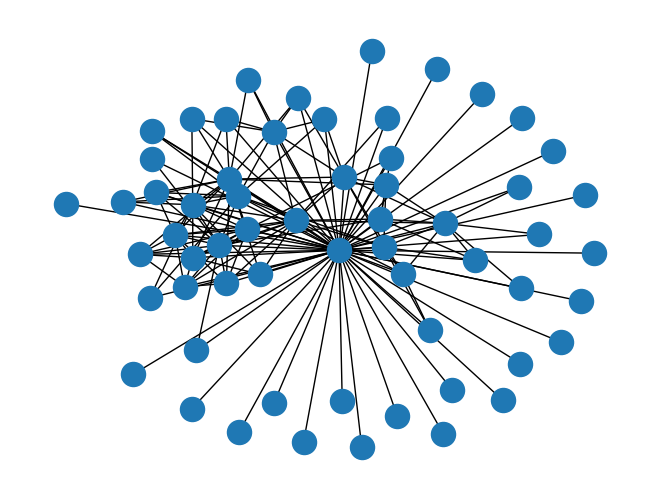

In [34]:
nx.draw(s_graph)

The betweenness centrality, in fact, calculating the shortest path between each pair of nodes in a graph where a node “i” lies, is the best method for understanding the influence that node i has over the connection of its neighbours.  
The last step was plotting the cumulative distribution for this function, which tells us, on a scale from 1 to 0 (always decreasing), the cumulative probability for a certain X value.

### COMPUTATIONS:

-	TASK 1:

#Step0: Knowing the formula for the Normalized Betweenness Centrality, we first recalled the nodes by using a NetworkX function and then computed the number by using the length:

$\mathbf{{C_{i}}^{between}} =\frac{1}{(N-1)*(N-2)/2}\cdot (\sum_{h\neq j,i\notin \left\{ h,j\left.\right \} \right.}^{}\frac{\sigma _{hj}(i)}{\sigma _{hj}})$

#Step1:
Then we have created a nested loop and, if the nodes i,j has respected some fundamental conditions, they will be appended in the list of the visited nodes. This is essential in order to don’t have a redundant output


#Step2: After that we have iterated over all the shortest paths between i and j and append each path in “s_paths”  (if the length of the path is greather than 2, otherwise it would be not respected the conditions of the series inside the betweenness formula).


#Step3: Then, we computed the normalized betweenness in order to see in a scale 0 to 1 (percentage), the influence that a node has over the flow of information of a graph and then plot it onto a cartesian plane.
To do it we have calculated how many times a node appears (saved them on number_of) and then divided by the total number of units.

In [35]:
def normalized_betweness_of(g):
    #step0:
    nodes = nx.nodes(g)
    n_nodes = len(g)
    visited = []
    s_paths = {}
    #step1:
    for i in nodes:
        for j in nodes:
            if i != j and ((i,j) not in visited or (j,i) not in visited):
                visited.append((i,j))
                #step2:
                for p in nx.all_shortest_paths(g, source=i, target=j):
                    if len(p)>2:
                        if (i,j) not in s_paths:
                            s_paths[(i,j)] = [p]
                        else:
                            s_paths[(i,j)].extend([p])
    #step3:
    normalized_betweness = {}
    ratio = 1/((n_nodes-1)*(n_nodes-2)/2)
    for n in nodes:
        sommatory = 0 
        for sp in s_paths:
            sp = s_paths[sp]
            n_inside_sp = 0 
            n_of_sp= len(sp)
            for k in sp:
                k = k[1:-1]
                if n in k:
                    n_inside_sp = n_inside_sp + 1
            sommatory = sommatory + (n_inside_sp/n_of_sp)
        betweeness = 0.5*sommatory
        normalized_betweness[n] = ratio*betweeness
    return normalized_betweness

n_betweeness = normalized_betweness_of(s_graph)

Then, we are interested on the cdf of the betweeness' centrality. This allows us to visualise which are the most present values.

First, we pick the centrality's values and count how many times these values are repeated, storing these results in an apposite dictionary, which will be sorted.
After that and computing the total number of units, we are ready to scale these values from 0 to 1 in a new dictionary f.
Then, we create two lists which will represent the respective coordinates of each point. The x values are simply the key values, whereas the y values are given by the sum of all the points above a certain point.
The function will return the plot of the function.


-	TASK 2:

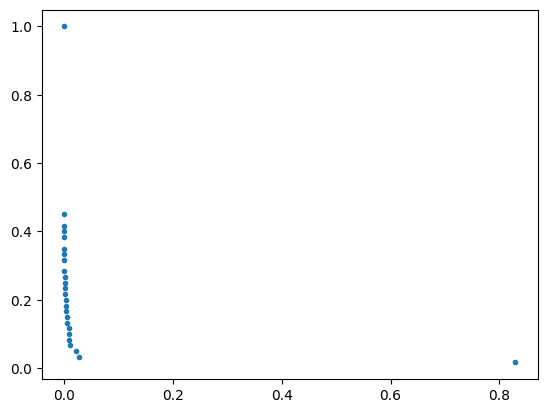

In [36]:
def computation_cdf (centrality):
    
    centralities = list(centrality.values())
    number_of = {}
    for i in centralities:
        if i not in number_of:
            number_of[i]= 1
        else:
            number_of[i]= number_of[i]+1 
    number_of = dict(sorted(number_of.items()))
    
    tot_number = sum(list(number_of.values()))
    f = {}
    for i in number_of:
        if number_of[i] == 0:
            f[i] = 0
        else:
            f[i]= number_of[i]/tot_number
    f_values = list(f.values())
    cd_y = []
    cd_x = [i for i in f]
    for k in range(len(f_values)):
         cd_y.append(sum(f_values[k:]))
    return plt.plot(cd_x,cd_y,'.')
computation_cdf(n_betweeness)

### CONCLUSIONS:

Reminding that the cumulative distribution function represents the sum of frequences of the values *above* a certain point, we can notice that there is a huge gap between the first two points and from the two last values. Instead in the middle the points are really close to each other. We can conclude that many points have their betweeness' value equal to 0, this explains the space between the first point and the others. Most of the other points have just a slight difference on their value, except for the last one which represents the higher point in this centrality.

# WEEK 5

### INTRODUCTION
This week we must resolve tasks related to PageRank: a really useful algorithm to analyze the importance of the different ‘pages’. Computing the PageRank centrality, we assign importance to a webpage analyzing the quantity and quality of the links that point to it in the different iterations. 
Doing a PageRank’s algorithm means to compute the ratio between the pagerank of the 
previous iteration and the out-degree of the nodes which link our node i.

$\mathbf{R_{t}} = \frac{\alpha }{N}+(1-\alpha )\cdot \sum_{j\in pred(i)}^{}\frac{R_{t-1}(j)}{k_{out}(j)}$

### PROCESS:

-	TASK 1:

#step0: Since all links on the web are directed (and not undirected like our graph), in the function below we convert our undirected graph into a directed one. 

 How can we implement this formula on Python?
We create a function which takes as inputs:
1.	The graph g
2.	The parameter alpha 

#step1-2:

The first rt (R_(t=0)) will have as values 1/N for each node, and then the formula for each node, for each iteration, that is the formula that we saw in class for pagerank.
The first rt (R_(t=0)) is created outside the while loop 

rt = {n:(1/(len(nx.nodes(g)))) for n in g}
times= 0
prev_rt= rt.copy()

Where len(nx.nodes(g))) is the number of nodes.
While our counter variable times is not equal to the thereshold t, then we do the following steps:
For every node in prev_rt, we do the calculation of their R_t based on the previous formula saving it in rt. To do this we need to use 2 for loops:
    
    1. The aim of the first for loop inside while is to compute the formula of the pagerank. We start with result = 0, adding the new values every call of the loop. 
	For every node n we enter in the list of their in-edges (inlinks[i]). The numerator is the value of i in the previous iteration, whereas  the numerator will be the out-degree of i, appointed as len(outlinks[i]). The result will be the ratio between the variables numerator and denominator. 
	We assign this value to rt[n]
	
    2. We do a for loop in the new rt, now for each key’s value we compute the rest of the pagerank’s formula.
        For the next iteration, rt becomes the prev_rt (previous R_t )
When the while loop ends, it will return rt. As we can see in #2 task, our function’s output coincides with the networkx’s output. 


In [37]:
def PageRank(g,alpha):
    #step0:
    g = nx.DiGraph(g)
    #step1:
    outlinks={}
    inlinks = {}
    listof_edges = nx.edges(g)
    for i in listof_edges:
        if i[0] not in outlinks:
            outlinks[i[0]] = [i[1]]
        else:
            outlinks[i[0]].append(i[1])
        if i[1] not in inlinks:
            inlinks[i[1]] = [i[0]]
        else:
            inlinks[i[1]].append(i[0])
    #step2
    rt = {n:(1/(len(nx.nodes(g)))) for n in g}
    times= 0
    prev_rt= rt.copy()
    while True:
        prev_rt= rt.copy()
        for n in prev_rt:
            result = 0
            for i in inlinks[n]:
                    numerator = prev_rt[i]
                    denominator = len(outlinks[i])
                    if denominator == 0:
                        result = result + 0
                    else:
                        result = result + ( numerator / denominator )
            rt[n]=result
        for n in rt:
            rt[n]= alpha/len(g) + (1-alpha)*rt[n]
        times = times + 1 
        if list(prev_rt.values()) == list(rt.values()):
            return rt,times


-	TASK 2:

As we can notice observing the two outcomes have just some tiny variations in the last decimal numbers due to different approximations. Therefore, we can conclude that the two functions are giving the same outcomes.

In [38]:
pr_subgraph = PageRank(s_graph,alpha=0.15)[0]
nx_pagerank = nx.pagerank(s_graph,alpha=0.85)

print (pr_subgraph)
print ()
print (nx_pagerank)

{4023: 0.04432257574796694, 3980: 0.1953654213746058, 3981: 0.020222885628306226, 3982: 0.03509237222272686, 3994: 0.027296523925012764, 3995: 0.024866595427290365, 3997: 0.026815170566233233, 3998: 0.03559614506770731, 4002: 0.01987358947203267, 4003: 0.01375175581413234, 4004: 0.0266611018598958, 4009: 0.024671755898057538, 4013: 0.017333647345568793, 4014: 0.03132569358418881, 4018: 0.018015282579937415, 4030: 0.04730890803015137, 4031: 0.03184865404847724, 4034: 0.00740759710055745, 4038: 0.024729205968496704, 594: 0.0077756189374171, 3983: 0.005314586579125677, 3984: 0.005314586579125677, 3985: 0.012148195323118728, 3986: 0.011780549336912386, 3987: 0.005314586579125677, 3988: 0.011910157831720879, 3989: 0.010105722738994833, 3990: 0.005314586579125677, 3991: 0.0077756189374171, 3992: 0.005314586579125677, 3993: 0.01204574317628932, 3996: 0.009837085006623487, 3999: 0.00747578110109362, 4000: 0.009779549518198176, 4001: 0.005314586579125677, 4005: 0.00747578110109362, 4006: 0.0053

-	TASK 3: 

We now want to identify the node with the highest PageRank and compare it with the Betweenness centrality computed during the Week 3, which tells us how much a node is influent in the connection of its neighbors. 

The main difference between them is that the Betweeness centrality gives values to a node in relation to its presence in the graphs' shortest paths, while the pagerank's values depend on the quantity / quality of connections between a node and its neighbors.

In [39]:
highest_pr_value = max(list(pr_subgraph.values()))
for i in pr_subgraph:
    if pr_subgraph[i]==highest_pr_value:
        highest_pr = i
        break

print ('Node with the highest PageRank:',highest_pr)
highest_betweeness_value = max(list(n_betweeness.values()))
for i in n_betweeness:
    if n_betweeness[i]==highest_betweeness_value:
        highest_betweeness = i
        break
print ('Node with the highest betweeness:',highest_betweeness)

Node with the highest PageRank: 3980
Node with the highest betweeness: 3980


Searching inside the distributions, we conclude that the node with the highest betweeness is the node with the highest Pagerank too. This means that the most-present node in the graph's shortest paths is also the most-important linked page between its neighbors.

-	TASK 4:

Looking to the different cdfs:

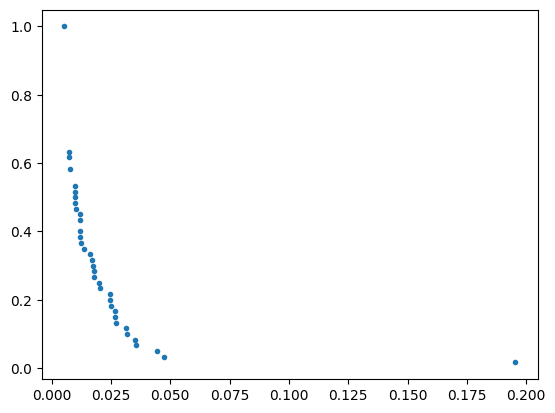

In [40]:
computation_cdf(pr_subgraph)


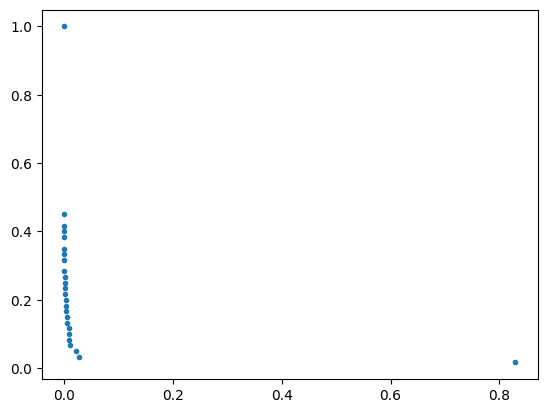

In [41]:
computation_cdf(n_betweeness)

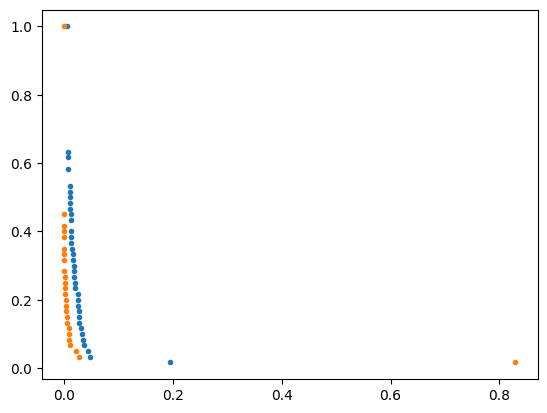

In [42]:
computation_cdf(pr_subgraph)
computation_cdf(n_betweeness)

We can notice how the two function have the same slope along the curve. This means that the two distributions has similar behaviour: they have many points equal to 0 and many different points between (0.0,0.05). A really intresting result that marks again how are close the two different centralities.

The betweeness distribution is more wide: [0,0.8] 

Whereas the pagerank's distribution is: [0,0.2]

It's important to remember that they are two different measures. We can analyse properly their differences on values because we have scaled the data from 0 to 1.

-	TASK 5:

Let's give another view on how the pagerank distribution may change. In this task we're not looking on the change of the distribution over different centralities, but we're analysing the change over different  (1-α) values: a damping parameter of pagerank's algorithm, which goes from 0 to 1.

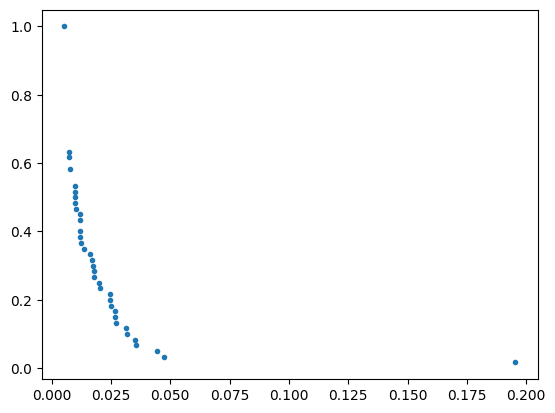

In [43]:
computation_cdf(pr_subgraph) 


Iterations alpha = 0.15 : 76
Iterations alpha = 0.5 : 41


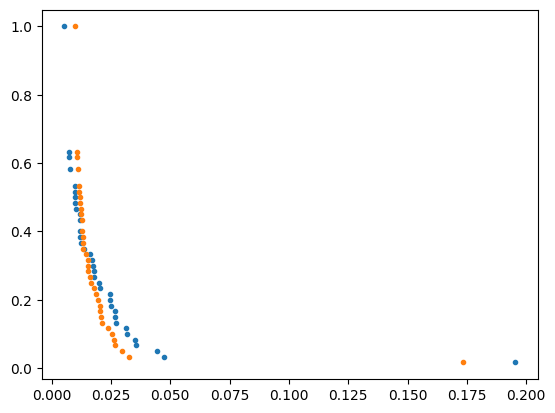

In [44]:
pr_subgraph1 = PageRank(s_graph,alpha=0.5)[0]
times = PageRank(s_graph,alpha=0.15)[1]
times1 = PageRank(s_graph,alpha=0.5)[1]

computation_cdf(pr_subgraph)
computation_cdf(pr_subgraph1)

print ('Iterations alpha = 0.15 :',times)
print ('Iterations alpha = 0.5 :',times1)

### CONCLUSION:
We conclude that, increasing the teleportation factor (alpha), the pagerank's algorithm converges faster: it has less iterations and the cdf decreases quickly. 
This is because we are increasing the probability that random jumps occurs.

## WEEK 6:

### INTRODUCTION
In this week we focus on community detection, which is very important in order to organise the functions of the network, identify features of the nodes, and classify them based on their cluster. This can be done by just applying different techniques to identify communities (mainly recognised as sets of nodes with much higher density between them rather than other sets) in a Network.


### PROCESS



In [45]:
import time #essential library for the following tasks

- TASK 1:

Bridge removal is a way to identify cluster by removing "bridges": particular edges that connect two communities. This technique can be applied by implementing the Girvan Newman's algorithm, which removes edges with the highest betweenness. 
We implemented it by using the NetworkX built-in function:

In [46]:

partitions = nx.community.girvan_newman(s_graph)

MODULARITY:
Modularity is a measure of the structure of a graph, measuring the density of connections in a community (= its quality). Graphs with a high modularity score will have many connections within a partition but only few pointing outwards to other communities. 

$Q = \frac{1}{L}\sum_{C}^{}(L_C-\frac{k^2_C}{4L})$

The modularity compute the difference between the number of internal links in a community C ($L_C$) and its expected value inside a configurational model ($\frac{k^2_C}{4L}$).

Now we're going to see different kind of configurational models.

For the Girvan Newman's algorithm, we need to find the maximum modularity of the highest partition.

In [47]:
t1_br = time.time()

max_modularity = 0
for partition in partitions:
    modularity = nx.community.quality.modularity(s_graph, partition) 
    if max_modularity == 0 or max_modularity<=modularity:
        max_modularity = modularity
        h_partition = partition
bridgeremoval = [frozenset(p) for p in h_partition]

t2_br = time.time()

print (bridgeremoval) 

[frozenset({4034, 4037, 3980, 3981, 3982, 3985, 3986, 3988, 3993, 3994, 3995, 3997, 3998, 3999, 4000, 4003, 4005, 4009, 4014, 4017, 4018, 4019, 4021, 4023, 4026, 4030}), frozenset({4002, 4004, 4038, 4013, 4020, 3989, 4027, 4031}), frozenset({594}), frozenset({3983}), frozenset({3984}), frozenset({3987}), frozenset({3990}), frozenset({3991}), frozenset({3992}), frozenset({3996}), frozenset({4001}), frozenset({4006}), frozenset({4007}), frozenset({4008}), frozenset({4010}), frozenset({4011}), frozenset({4012}), frozenset({4015}), frozenset({4016}), frozenset({4022}), frozenset({4024}), frozenset({4025}), frozenset({4028}), frozenset({4029}), frozenset({4032}), frozenset({4033}), frozenset({4035}), frozenset({4036})]


In the cell below we have computed the Modularity Optimization which tries to detect communities in the graph based on their modularity, so maximising it in every possible partition of the network. The networkx function that we used, does this job uses the Greedy merging algorithm, which connects psirs of groups of nodes with the maximum increase of modularity until they are all in the same community.

In [48]:
t1_mo = time.time()

modularity_opt = nx.community.greedy_modularity_communities(s_graph)

t2_mo =time.time()

print (modularity_opt)

[frozenset({4032, 4033, 4035, 4036, 3980, 3983, 3984, 3987, 3990, 3992, 4001, 4006, 4007, 4008, 4010, 4012, 4015, 4016, 4022, 4024, 4025, 4028, 4029}), frozenset({4034, 4002, 4004, 4038, 4011, 4013, 4023, 594, 4020, 3989, 3991, 4027, 4031}), frozenset({4000, 4037, 3982, 4014, 3985, 4017, 3986, 3988, 4021, 3993, 4026, 3995, 4030}), frozenset({4003, 4005, 4009, 3981, 4018, 4019, 3994, 3996, 3997, 3998, 3999})]


LABEL PROPAGATION:

A method that is based on the assumption tha the neighbors of a node are in the same community.

In [49]:
t1_lp = time.time()

communities = nx.community.asyn_lpa_communities(s_graph,seed=42)    

label_p = [frozenset(c) for c in communities]

t2_lp = time.time()

print (label_p)

[frozenset({4034, 4037, 3981, 3982, 3985, 3986, 3988, 3993, 3994, 3995, 3997, 3998, 4000, 4003, 4004, 4005, 4009, 4014, 4017, 4018, 4019, 4021, 4023, 4026, 4030}), frozenset({4032, 4033, 4035, 4036, 3980, 3983, 3984, 594, 3987, 3990, 3992, 3999, 4001, 4006, 4007, 4008, 4010, 4011, 4012, 4015, 4016, 4022, 4024, 4025, 4028, 4029}), frozenset({4002, 4038, 4013, 4020, 3989, 3991, 4027, 3996, 4031})]


Label propagation is another algorithm for finding communities. Its advantages/disadvantages are written below.

- TASK 2/3:

Now we're going to compare the different techniques looking to their results.

In [50]:
#number of detected clusters:
dc_bridgeremoval = len(bridgeremoval)
dc_modularity_opt = len(modularity_opt)
dc_label_p = len(label_p)
print (dc_bridgeremoval,dc_modularity_opt,dc_label_p)

28 4 3


In [51]:
#computational time
print ('The computational time for bridge removal is:',t2_br-t1_br,'seconds' )
print ('The computational time for modularity optimization is:',t2_mo-t1_mo,'seconds'  )
print ('The computational time for label propagation is:',t2_lp-t1_lp,'seconds'  )


The computational time for bridge removal is: 0.2456042766571045 seconds
The computational time for modularity optimization is: 0.008210897445678711 seconds
The computational time for label propagation is: 0.0007159709930419922 seconds


It shows that label propagation is the fastest technique for our graph.

In comparison with other algorithms, label propagation has advantages in its running time. However, since the networkx's command is asynchronous (each node is updated without waiting for updates on the remaining nodes) the final outcome may differ. We use the parameter seed to avoid different results; which is useful to don't have alterations in the next operations.

Then, we are asked for computing the cluster size founded in each method. We will create a dicrionary for each technique where we put the sizes as keys and their frequence as values. We chose to use a dictionary to have a summary on the number of communities (values) and their sizes (keys).

In [52]:
#cluster size distribution 
csize_bridgeremoval = {}
csize_modularity_opt = {}
csize_label_p = {}
for c in bridgeremoval:
    if len(c) not in csize_bridgeremoval.keys():
        csize_bridgeremoval[len(c)] = 1
    else:
        csize_bridgeremoval[len(c)] = csize_bridgeremoval[len(c)] + 1
for c in modularity_opt:
    if len(c) not in csize_modularity_opt.keys():
        csize_modularity_opt[len(c)] = 1
    else:
        csize_modularity_opt[len(c)] = csize_modularity_opt[len(c)] + 1
for c in label_p:
    if len(c) not in csize_label_p.keys():
        csize_label_p[len(c)] = 1
    else:
        csize_label_p[len(c)] = csize_label_p[len(c)] + 1

print (csize_bridgeremoval)
print (csize_modularity_opt)
print (csize_label_p)

{26: 1, 8: 1, 1: 26}
{23: 1, 13: 2, 11: 1}
{25: 1, 26: 1, 9: 1}


At this point, we will prepare our technique's vectors in order to be able to compute NMIs. 

In [53]:
from sklearn.metrics.cluster import normalized_mutual_info_score
partitionmap_gn = {}
partitionmap_mo = {}
partitionmap_lp = {}
#the aim of these dictionaries is explained later

In [54]:
vector_br=[]
vector_mo=[]
vector_lp=[]
n_sgraph = sorted(s_graph.nodes())
for n in n_sgraph:
    countgn = 0
    countmo = 0
    countlp = 0
    for c in bridgeremoval:
        for i in c:
            if i == n:
                vector_br.append(countgn)
                partitionmap_gn[n]= countgn
        countgn = countgn + 1 
    for c in modularity_opt:
        for i in c:
            if i == n:                
                vector_mo.append(countmo)
                partitionmap_mo[n]= countmo
        countmo = countmo + 1 
    for c in label_p:
        for i in c:
            if i == n:
                vector_lp.append(countlp)
                partitionmap_lp[n]= countlp
        countlp = countlp + 1 

print (vector_br)
print (vector_mo)
print (vector_lp)

[2, 0, 0, 0, 3, 4, 0, 0, 5, 0, 1, 6, 7, 8, 0, 0, 0, 9, 0, 0, 0, 0, 10, 1, 0, 1, 0, 11, 12, 13, 0, 14, 15, 16, 1, 0, 17, 18, 0, 0, 0, 1, 0, 19, 0, 20, 21, 0, 1, 22, 23, 0, 1, 24, 25, 0, 26, 27, 0, 1]
[1, 0, 3, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 0, 2, 3, 2, 3, 3, 3, 3, 2, 0, 1, 3, 1, 3, 0, 0, 0, 3, 0, 1, 0, 1, 2, 0, 0, 2, 3, 3, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 1]
[1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2]


Vectors, in order to be operable, they must have the same order of nodes. To do so, we sort the list of nodes of s_graph.
For every node in the list,and for every technique, we will check in which cluster a node is. We will add the number of a community when is found the node inside a cluster.



The Normalized Mutual Information (NMI) is a good measure for determining the
quality of clustering. When NMI is equal to 1, we have a perfect complete labeling. In the code below we observe that we obtain float values in the interval (0.47,0.6). In this case the values are in the average. 

In [55]:
#NMI computation:
NMI_for_gn = normalized_mutual_info_score(vector_br, vector_mo)
NMI_for_mo = normalized_mutual_info_score(vector_br, vector_lp)
NMI_for_lp = normalized_mutual_info_score(vector_mo, vector_lp)

print("The Normalized Mutual Information Scores for the three techniques are:" , NMI_for_gn, NMI_for_mo, NMI_for_lp)

The Normalized Mutual Information Scores for the three techniques are: 0.4762128317172057 0.4939877668065894 0.5960354062200877


In [56]:

#MODULARITIES FOR EACH MEASURE:

modularity_br = nx.community.quality.modularity(s_graph, bridgeremoval)
modularity_mo = nx.community.quality.modularity(s_graph, modularity_opt)
modularity_lp = nx.community.quality.modularity(s_graph, label_p)  

print("The modularities for the three techniques are:" , modularity_br, modularity_mo, modularity_lp)



The modularities for the three techniques are: 0.11935694585571184 0.3278596312962695 0.2711024822180288


The three techniques have relatively small differences between their values, especially for modularity_mo and modularity_lp. The higher modularity has the modularity optimisation, while the smaller modularity is of the bridge removal. Considering the definition of modularity and the computational time of the different measures, we're not surprised about this result. Looking to the bridge removal, is the technique with the biggest computational time and lowest modularity.

In [57]:

# 3) Give an interpretation to the differences and similarities between the three resulting partitions, and discuss which one you think is the best and why.
gn_quality = nx.community.partition_quality(s_graph, bridgeremoval)
mo_quality = nx.community.partition_quality(s_graph, modularity_opt)
lp_quality = nx.community.partition_quality(s_graph, label_p)

print (gn_quality, mo_quality , lp_quality)

(0.6927710843373494, 0.8367231638418079) (0.5783132530120482, 0.752542372881356) (0.7048192771084337, 0.6649717514124294)


In the code above, it returns the coverage and the performance for each paritions. 

The coverage of a partition is the ratio of the number of intra-community edges to the total number of edges in the graph. The performance of a partition is the number of intra-community edges plus inter-community non-edges divided by the total number of potential edges.


Looking at the defintions, we would choose the modularity optimisation. Less is the coverage value, and more dense would be each community related to the rest of the graph. Higher is the performance, and more possible edges are used to build communities.



 

- TASK 4:

In [58]:
# 4) Optional: Provide a visualization for the three partitions using your favorite tool (e.g., NetworkX or Gephi).
node_colors_gn = [partitionmap_gn[n] for n in n_sgraph]
node_colors_mo = [partitionmap_mo[n] for n in n_sgraph]
node_colors_lp = [partitionmap_lp[n] for n in n_sgraph]


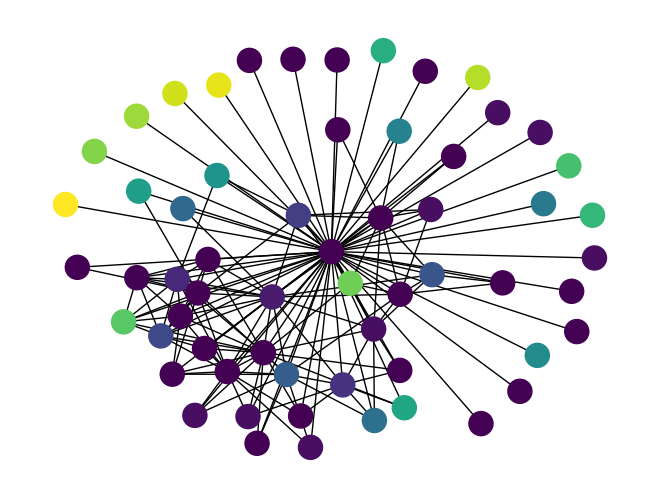

In [59]:
nx.draw(s_graph, node_color = node_colors_gn)

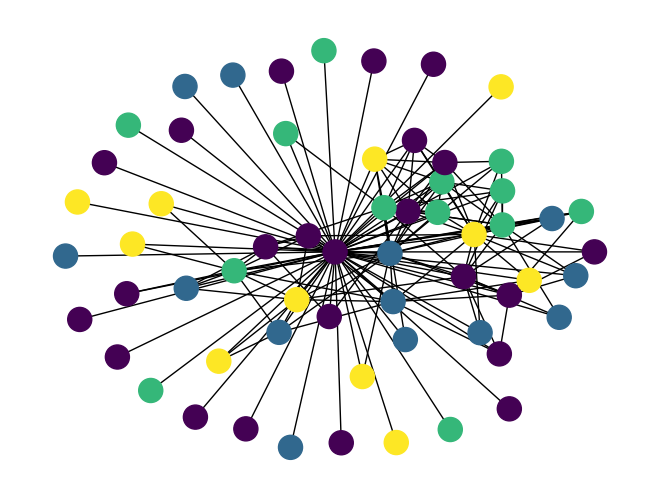

In [60]:
nx.draw(s_graph, node_color = node_colors_mo)

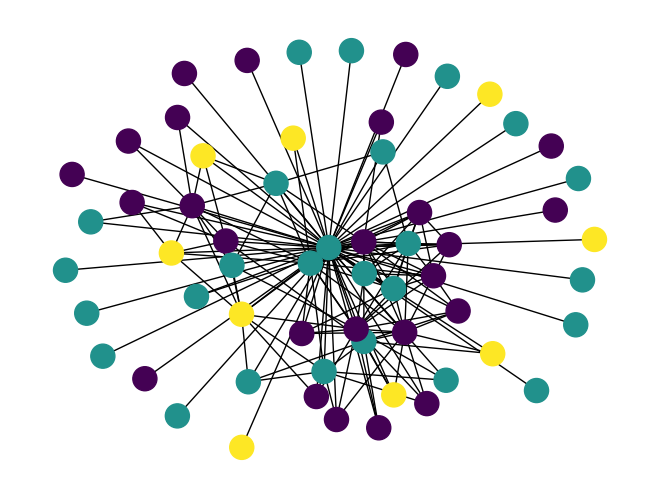

In [61]:
nx.draw(s_graph, node_color = node_colors_lp)

### CONCLUSION


We understood that there can be different ways to divide a graph in labels, and there is not a best choice for all graphs, but it depends on our single graph. The analysis above are a great way to decide which is the best possible partitions. 

## WEEK 7

### INTRODUCTION

In this week, the our goal is to study  the link predictions using similarity approaches and analyse the results obtained from these computations. So, we are going to study the calculation and use of topological similarity indices.



### PROCESS

In [62]:
import pandas as pd #permits us to create DataFrames

As the task requires, we create a list of nodes in form of strings.

In [63]:
listofnodes = sorted(s_graph)
listofnodes = [str(i) for i in s_graph]

#step1: 

For first, we need to know which are the common neighbors between each pair of nodes(except for the connected pairs). With a nested loop, if all fundamental conditions are respected, we check for a new pair of nodes which are the nodes present in both nodes' neighbors lists. We add all the common neighbors that we can find in a list which will be attached to a dictionary key at the end of the iteration. During these operations are necessary some variable's type conversions.

$\mathbf{CN}= \left|\Gamma (x)\cap\Gamma(y) \right|$

#step2: 
Therefore, for each pair of nodes in cn, we apply the formulas below:

$JI(x,y) = \frac{\left|\Gamma (x)\cap\Gamma(y) \right|}{\left|\Gamma (x)\cup\Gamma(y) \right|}$ 

$\mathbf{PA(x,y)} =  \left|\Gamma (x) \right|\times \left| \Gamma (y)\right|$


$\mathbf{AA(x,y}  = \sum_{z\in\Gamma (x)\cap\Gamma(y)} \frac{1}{log\left| \Gamma (z)\right|} $


$\mathbf{RA(x,y)}  =  \sum_{z\in\Gamma (x)\cap\Gamma(y)} \frac{1}{log\left| \Gamma (z)\right|}$


Then, we all return these informations collected in a dictionary in a pandas DataFrame.

In [64]:
def similarities(graph,listofnodes):
    #step1
    graphedges = [e for e in graph.edges]
    cn = {}
    visited_n=[]
    for n1 in listofnodes:
        for n2 in listofnodes:
            if int(n1)!=int(n2) and ((int(n1),int(n2)) not in graphedges):
                if ((n1,n2) or (n2,n1)) not in (cn and visited_n):
                    visited_n.append((n1,n2))
                    cn_node_n1n2 = [] 
                    for i in graph[int(n1)]:
                        if i in graph[int(n2)] and str(i) not in cn_node_n1n2:
                            cn_node_n1n2.append(str(i))
                    for j in graph[int(n2)]:
                        if j in graph[int(n1)] and str(j) not in cn_node_n1n2:
                            cn_node_n1n2.append(str(j))
                    cn[(n1,n2)]=cn_node_n1n2
    #step2
    n_cn = {i:len(cn[i]) for i in cn} # number of c.n for each pair of nodes
    ji = []
    pa = []
    aa = []
    ra = []
    for (n1,n2) in cn:
        ji.append( len(cn[(n1,n2)])/(len(graph[int(n1)])+len(graph[int(n2)])) ) 
        
        pa.append(len(graph[int(n1)])*len(graph[int(n2)]))
        
        countz1=0
        countz2= 0
        for z in cn[(n1,n2)]:
            countz1=countz1 + 1/(np.log10(len(graph[int(z)])))
            countz2=countz2 + 1/(len(graph[int(z)]))
        aa.append(countz1)
        ra.append(countz2)
    data = {
            'CN' : n_cn,
            'JI' : ji,
            'PA' : pa,
            'AA' : aa,
            'RA' : ra,
            }
    df = pd.DataFrame( data , index=list(cn.keys()))
    return df
df = similarities(s_graph,listofnodes)
df

,CN,JI,PA,AA,RA
"(4023, 594)",2,0.100000,36,1.524952,0.107858
"(4023, 3983)",1,0.052632,18,0.564700,0.016949
"(4023, 3984)",1,0.052632,18,0.564700,0.016949
"(4023, 3985)",4,0.181818,72,3.539280,0.311394
"(4023, 3986)",4,0.181818,72,3.145843,0.224343
...,...,...,...,...,...
"(4037, 4029)",1,0.250000,3,0.564700,0.016949
"(4037, 4032)",1,0.250000,3,0.564700,0.016949
"(4037, 4033)",1,0.250000,3,0.564700,0.016949
"(4037, 4035)",1,0.250000,3,0.564700,0.016949


In [65]:
#2) Compute 6 link likelihood scores: one for each of the five indices, and one obtained as the arithmetic mean of the indices. [NB: the arithmetic mean should be computed after rescaling each column between 0 and 1.]
def min_max_scale(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

scaled_df = df.transform(min_max_scale, axis = 0)
print (scaled_df)

                    CN        JI        PA        AA        RA
(4023, 594)   0.111111  0.200000  0.031250  0.064291  0.035043
(4023, 3983)  0.055556  0.105263  0.015179  0.023808  0.005507
(4023, 3984)  0.055556  0.105263  0.015179  0.023808  0.005507
(4023, 3985)  0.222222  0.363636  0.063393  0.149215  0.101172
(4023, 3986)  0.222222  0.363636  0.063393  0.132627  0.072889
...                ...       ...       ...       ...       ...
(4037, 4029)  0.055556  0.500000  0.001786  0.023808  0.005507
(4037, 4032)  0.055556  0.500000  0.001786  0.023808  0.005507
(4037, 4033)  0.055556  0.500000  0.001786  0.023808  0.005507
(4037, 4035)  0.055556  0.500000  0.001786  0.023808  0.005507
(4037, 4036)  0.055556  0.500000  0.001786  0.023808  0.005507

[3374 rows x 5 columns]


Putting the scores in a scale from 0 to 1 is easier to understand the size of the scores. Then we add a column for the mean scores. 

In [66]:
mean_indices = scaled_df.aggregate(np.mean, axis = 1)
s_df = pd.concat([df, mean_indices], axis = 1)
s_df.columns = ('s_CN','s_JI','s_PA','s_AA','s_RA','s_Mean')
print (s_df)

              s_CN      s_JI  s_PA      s_AA      s_RA    s_Mean
(4023, 594)      2  0.100000    36  1.524952  0.107858  0.088339
(4023, 3983)     1  0.052632    18  0.564700  0.016949  0.041062
(4023, 3984)     1  0.052632    18  0.564700  0.016949  0.041062
(4023, 3985)     4  0.181818    72  3.539280  0.311394  0.179928
(4023, 3986)     4  0.181818    72  3.145843  0.224343  0.170954
...            ...       ...   ...       ...       ...       ...
(4037, 4029)     1  0.250000     3  0.564700  0.016949  0.117331
(4037, 4032)     1  0.250000     3  0.564700  0.016949  0.117331
(4037, 4033)     1  0.250000     3  0.564700  0.016949  0.117331
(4037, 4035)     1  0.250000     3  0.564700  0.016949  0.117331
(4037, 4036)     1  0.250000     3  0.564700  0.016949  0.117331

[3374 rows x 6 columns]


In [67]:
#3) For each of the 6 scores, identify as missing links the node pairs yielding the largest 10 values. Briefly comment the results.
sorted__s_df = s_df.rank(axis = 0, method = 'first', ascending = False)
missinglinks = {}
for i in sorted__s_df:
    missinglinks[i] = sorted__s_df[sorted__s_df[i] <= 10].index.to_list()
print (missinglinks)

{'s_CN': [('3980', '4023'), ('3982', '3980'), ('3994', '3980'), ('3997', '3980'), ('3998', '3980'), ('3998', '4030'), ('4014', '3980'), ('4030', '3980'), ('4030', '3982'), ('4030', '3998')], 's_JI': [('594', '3991'), ('594', '4011'), ('3983', '3984'), ('3983', '3987'), ('3983', '3990'), ('3983', '3992'), ('3983', '4001'), ('3983', '4006'), ('3983', '4007'), ('3983', '4008')], 's_PA': [('3980', '4023'), ('3982', '3980'), ('3994', '3980'), ('3997', '3980'), ('3998', '3980'), ('4004', '3980'), ('4009', '3980'), ('4014', '3980'), ('4030', '3980'), ('4031', '3980')], 's_AA': [('3980', '4023'), ('3982', '3980'), ('3994', '3980'), ('3995', '3980'), ('3998', '3980'), ('4004', '3980'), ('4014', '3980'), ('4030', '3980'), ('4030', '3982'), ('4031', '3980')], 's_RA': [('3980', '4023'), ('3982', '3980'), ('3995', '3980'), ('3995', '4030'), ('3998', '3980'), ('4014', '3980'), ('4030', '3980'), ('4030', '3982'), ('4030', '3995'), ('4031', '3980')], 's_Mean': [('3980', '4023'), ('3982', '3980'), ('39

### CONCLUSION
Using pandas functions, Missinglinks dictionary returns the indexes (pair of nodes) with the 10 highest values for each column of the dataframe. In a scale [0,1], we can observe how values are mainly really small. This is not strange since we're putting many values from 0 to 1.

## WEEK 9

### INTRODUCTION

In this week we had to choose a random graph method, and figure out if it is a good approximation of our graph. 
We have chosen the preferential attachment method because in our graph nodes are more likely to link to already highly connected nodes. 
Here's how preferential attachment works: at each step a new node is created, adding links to nodes that already exist in the network. The nodes where the link attach to are chosen proportionally to the existing degree.

### PROCESS


#step0:

We create a function that takes as inputs the (number of nodes*2) of the future graph (look to nnodes = nnodes // 2) and the number of links which creates an entering node. After few observations we considered k the best choice for our graph. 

#step1:
We create the complete graph and the list of (unvisited) its nodes. Therefore we enter to a while loop, which goes on until all nodes are visited. 

#step2:
If it's the first step for the creation of the random graph, we take two random nodes n1 n2 and we create an edge between them, removing them from the list of unvisited nodes. 

#step3:
In all other steps we take a random node and, calculating at every iterations the present nodes and their degrees, the new node will attach to three existing nodes. The probability is influenced by the higher degrees.

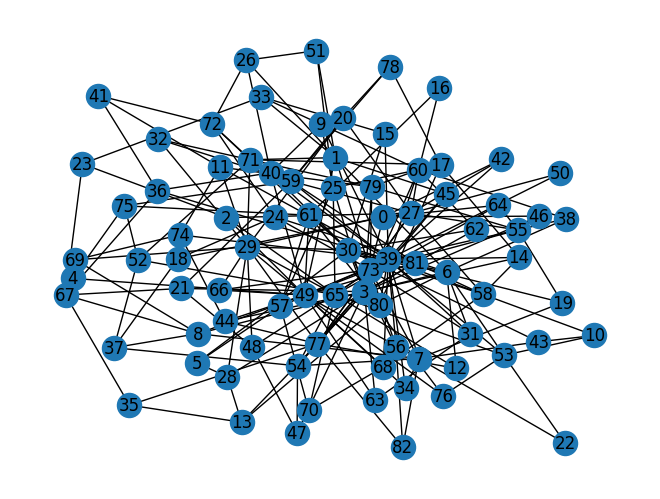

In [68]:
import random
#step0
l = len(nx.nodes(s_graph)) #number of nodes of the initial graph
m = len(nx.edges(s_graph)) #number of edges of the initial graph
k = m//l + 1
def pa (nnodes,degreenewnode):
    #step1:
    nnodes = nnodes // 2
    g = nx.complete_graph(nnodes)
    g1 = nx.Graph()
    gnodes= list(g.nodes()) 
    while gnodes!=[]:
        #step2:
        if len(g1.nodes())==0: # creating the first edge of the graph
            n1 = random.choice(gnodes)
            n2 = random.choice (gnodes)
            g1.add_edge(n1,n2)
            gnodes.remove(n1)
            gnodes.remove(n2)
        #step3:
        ni= random.choice(gnodes) 
        gnodes.remove(ni) # remove it from the nodes we still to pick 
        g1degreekeys = [i[0] for i in g1.degree] # nodes in the new graph
        g1degreevalues = [i[1]/len(g1) for i in g1.degree] #degree of nodes in the new graph
        for _ in range (degreenewnode):
            r2 = random.choices(g1degreekeys, weights = g1degreevalues)[0] #choose one node at random but considering their degrees
            g1.add_edge(ni,r2)
    return g1
pa_sgraph = pa(m,k)
nx.draw((pa_sgraph),with_labels=(True))

In this part we compare:
- the correct average degree to the average degree of the model
- the correct cumulative distribution of the betweenness with the one of the model  

The average degree of the actual graph is : 5.533333333333333
The average degree of the model is:  5.445783132530121
betweennes of the model: [<matplotlib.lines.Line2D object at 0x2940453f0>]
correct betweennes: [<matplotlib.lines.Line2D object at 0x294045600>]


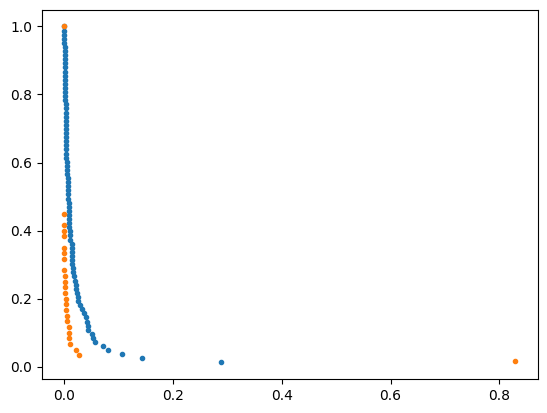

In [69]:
total_deg = 0
for i in list(nx.degree(pa_sgraph)):
    total_deg = total_deg + i[1]

kp=total_deg/(pa_sgraph.number_of_nodes()) 

av_degree_sgraph = 2*(m)/l

print ('The average degree of the actual graph is :', av_degree_sgraph)
print ('The average degree of the model is: ', kp)

betweenness_pa = normalized_betweness_of(pa_sgraph)
print ('betweennes of the model:', computation_cdf(betweenness_pa)) 
print('correct betweennes:', computation_cdf(n_betweeness))

### CONCLUSIONS


Looking at the slopes, model behaves similarly to the original graph, therefore we can affirm it's a good model for our graph. The main difference between the two functions is that the model has more points, so there are more differences between values, but still in the same range of the original graph. 

## WEEK 10

### INTRODUCTION:


In this final week, our aim is to provide a functional propagation model among our graph. Since we have a graph created from users' relationships on Facebook, we thought it was interesting to apply a model for the information diffusion: we have chosen the bass contagion model. We have added also some features on the general formula, which will be exhaustively explained in the following lines.
ICM is a stochastic model, therefore there is some randomness in the propagations. Each 'infected' node with different probabilities will activate its neighbors, but this can happen only once. If no new node is activated at iteration t, the propagation will stop.

What we thought was interesting to revise, are the probabilities on:
1. When node actives a neighbor
2. Which, and when, active nodes propagate

### PROCESS

Let's observe step by step what we have done.

#step0:
Before while loop, we have several lists:
1. visited: list of all active nodes until iteration t (included)
2. activenodes: active nodes at iteration t (excluded the previous)
3. next_activenodes: active nodes at iteration t+1
4. n_visited: number of visited nodes per iteration --> useful for the final plot
5. n_notvisited:number of unvisited nodes per iteration --> useful for the final plot


#step1:
While the list of active nodes is not empty, we do a for loop inside the activenodes. Here, the active nodes are the nodes that actually try to connect their neighbors. In real case scenarios, we have seen that if many nodes are already activated, the propagation starts to slow. We thought we would get more interesting results reducing the number of 'viral' nodes if the 66% of all nodes are activated. In this case, we take consider randomly 1/3 of our already active nodes.

#step2:
Inside the for loop, we take every single neighbor of an active node. At each neighbor, we compute the ratio of inactive nodes around it over the number of all its friends. If the random probability to get infected is more than this ratio, then it will be 'infected'. This means that, if there are many active agents around a node, it will have more chance to be activated too.

#step3:
When this for loop ends, we copy the list of next active nodes into the active, clearing next_activenodes for the following iteration. 

#step4:
If we are arrived to the final iteration, then we plot the results we have obtaiend in a barplot, where we analyse the difference between active and inactive nodes at eavh iteration. Which allows us to observe the information's spread.


In [70]:
def ICM(chosengraph, initialoutbreak):
    #step0:
    activenodes = initialoutbreak[:]
    visited = initialoutbreak[:]
    next_activenodes = []
    t = 0
    n_visited = [len([x for x in chosengraph if x in visited])]
    n_notvisited = [len([x for x in chosengraph if x not in visited])]
    while activenodes:
        #step1:
        t = t + 1
        if len(activenodes)>=2/3*len(chosengraph):
            propagablenodes = random.sample(activenodes,round ((1/3)*len(activenodes)))
            activenodes = propagablenodes[:]
        for node in activenodes:
        #step2:
            for neighbor in chosengraph[node]:
                if neighbor not in activenodes and neighbor not in visited:
                    not_visited_neighbors = 0
                    for n in chosengraph[neighbor]:
                        if n not in visited:
                            not_visited_neighbors += 1
                    p = not_visited_neighbors / len(chosengraph[neighbor])
                    if random.random() > p:
                        next_activenodes.append(neighbor)
                        visited.append(neighbor)
        #step3:
        n_visited.append(len([x for x in chosengraph if x in visited]))
        n_notvisited.append(len([x for x in chosengraph if x not in visited]))
        activenodes = next_activenodes[:]
        next_activenodes.clear()
        if activenodes == []:
            #step4:
            iterations = ['t='+str(x) for x in range (t+1)]
            x_axis = np.arange(len(iterations))

            plt.bar(x_axis -0.2, n_notvisited, width=0.4, label = 'Not Activated')
            plt.bar(x_axis +0.2, n_visited, width=0.4, label = 'Activated')   
            
            plt.xticks(x_axis, iterations)
            plt.legend()
            plt.show()
            break

Let's see how the propagations changes, choosing different type/size of the initial outbreak. Since the results are not always equal at each run, we will consider for each outbreak a sample of 5 runs.

We decided to consider:
1. Two maximum numbers in the Betweeness Centrality
2. Two minimum numbers in the Betweeness Centrality
3. Random sample of nodes, large 5% and 15% of the entire population


In [71]:
max1 = sorted(n_betweeness.values())[-1]
max2 = sorted(n_betweeness.values())[-2]
min1 = sorted(n_betweeness.values())[1]
min2 = sorted(n_betweeness.values())[2]
for i in n_betweeness:
    if n_betweeness[i] == max1:
        max1 = i
    if n_betweeness[i] == max2:
        max2 = i
    if n_betweeness[i] == min1:
        min1 = i
    if n_betweeness[i] == min2 and i!=min1:
        min2 = i

1. Two maximum numbers in the Betweeness Centrality:

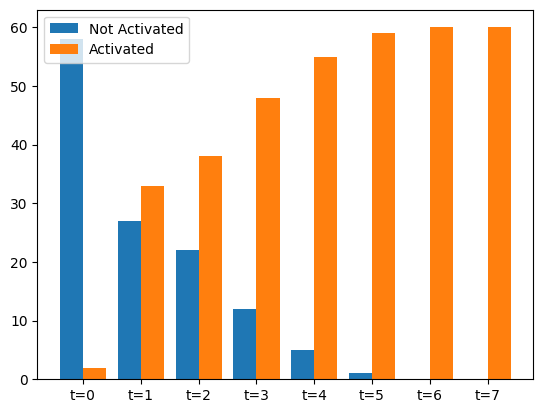

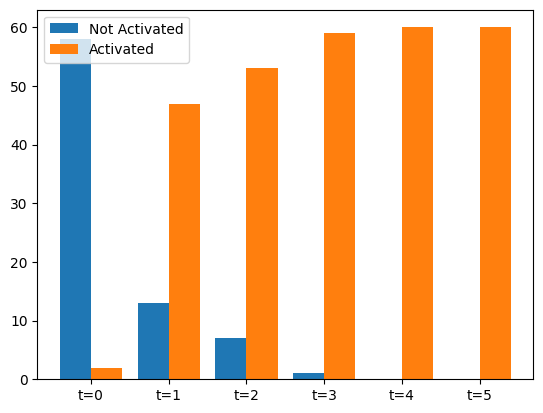

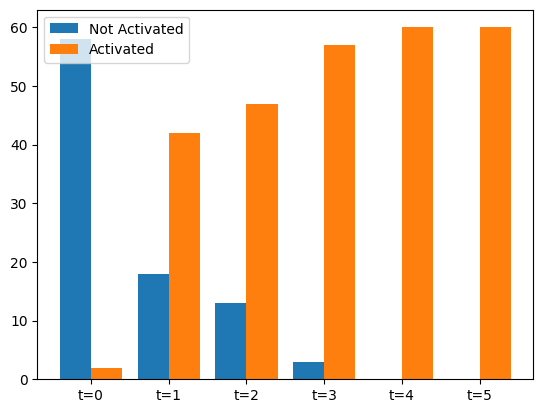

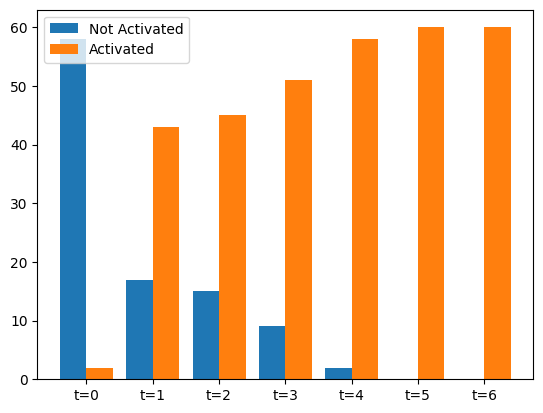

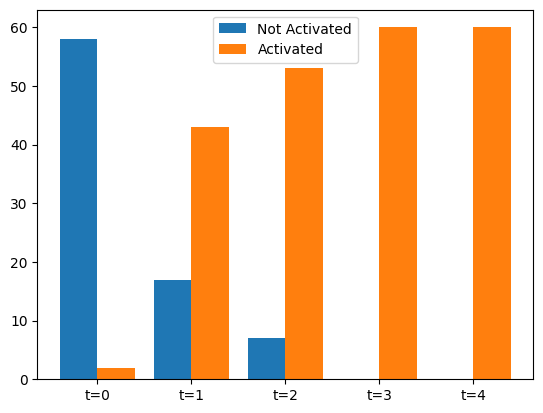

In [72]:
for i in range (5):
    ICM(s_graph,[max1,max2])

Taking the most important nodes in the graph's shortest paths, with a probability close to 1 we can affirm that the infection would spread over the all graph. 

2. Two minimum numbers in the Betweeness Centrality


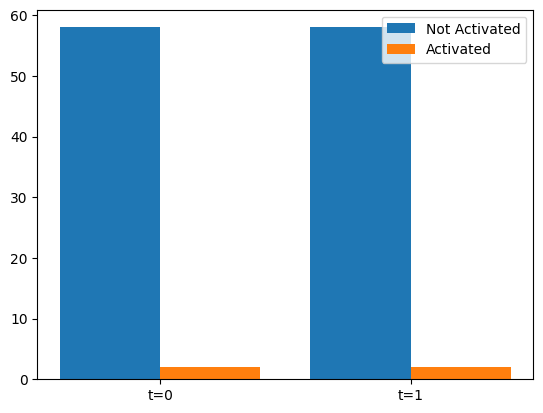

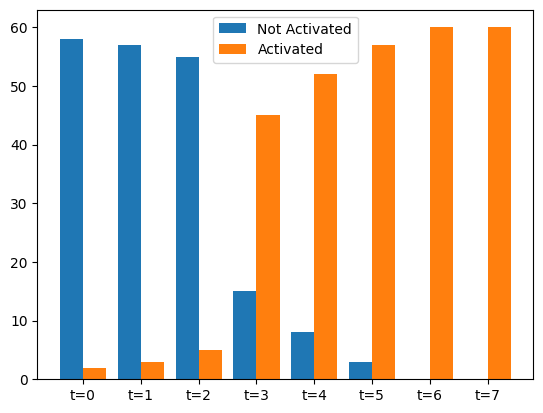

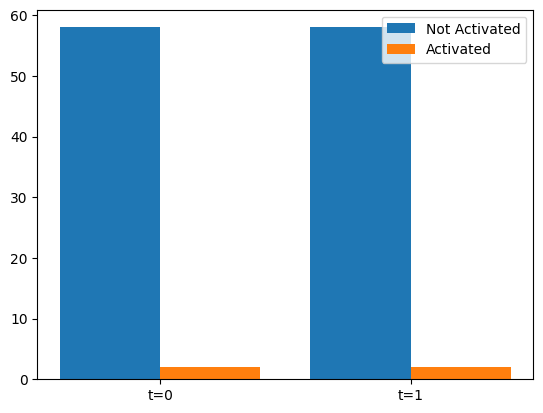

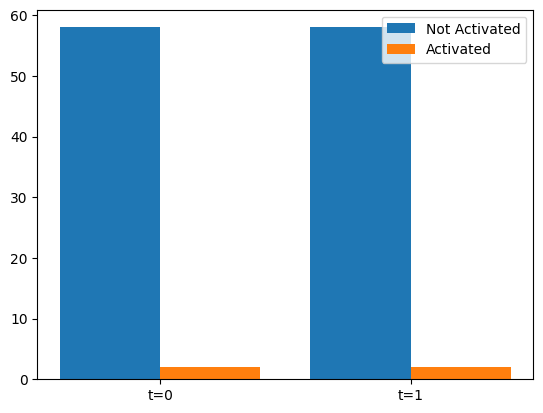

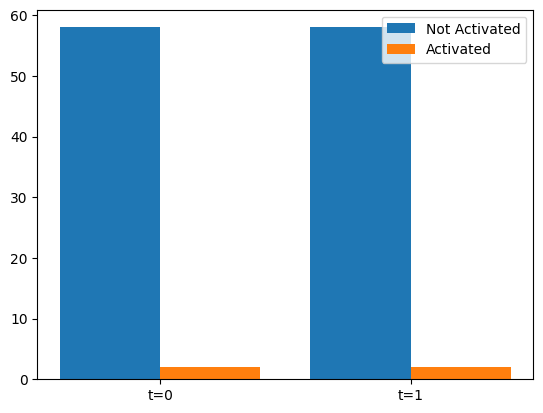

In [73]:
for i in range (5):
    ICM(s_graph,[min1,min2])

Taking the less important nodes in the graph's shortest paths, it's unlikely that the infection would spread over the all graph. 

3. Random sample of nodes, large 5% of the entire population

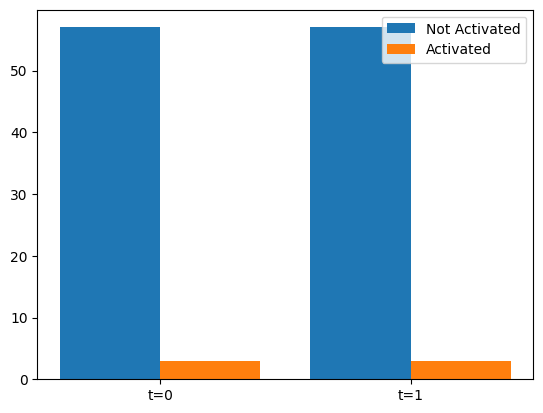

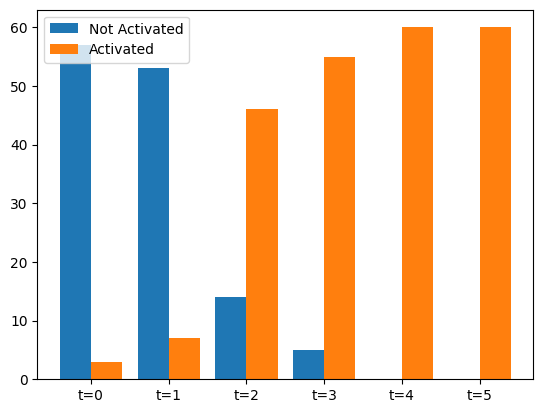

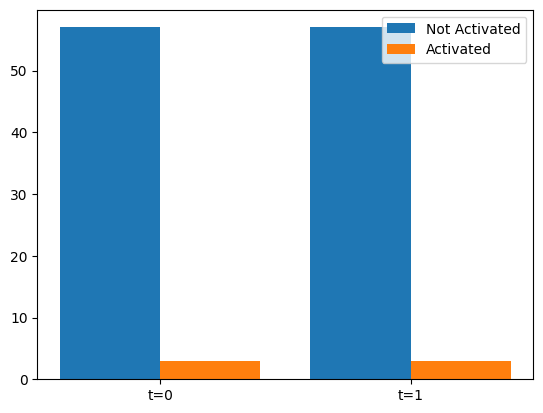

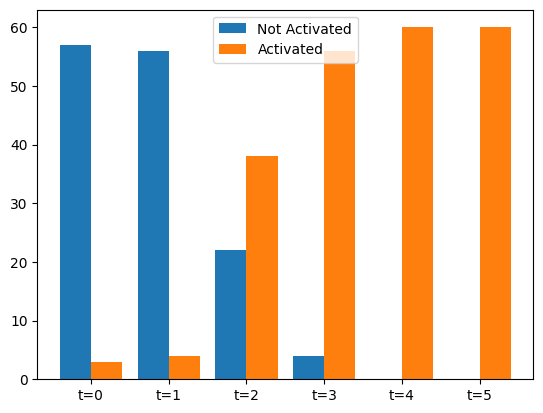

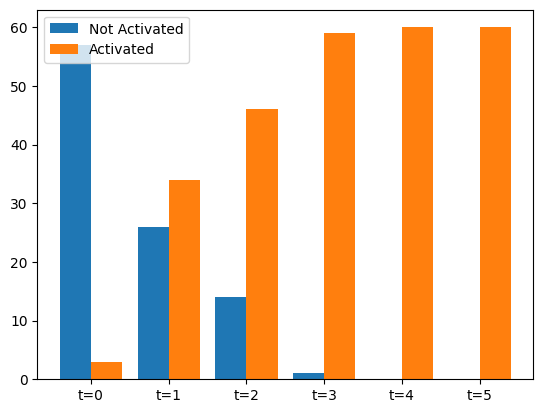

In [74]:
for i in range (5):
    ICM(s_graph,random.sample(list(s_graph.nodes()),round(0.05*len(s_graph))))

We can observe that, for a small percentual of active nodes, is really likely that the propagation stops.

3. Random sample of nodes, large 15% of the entire population

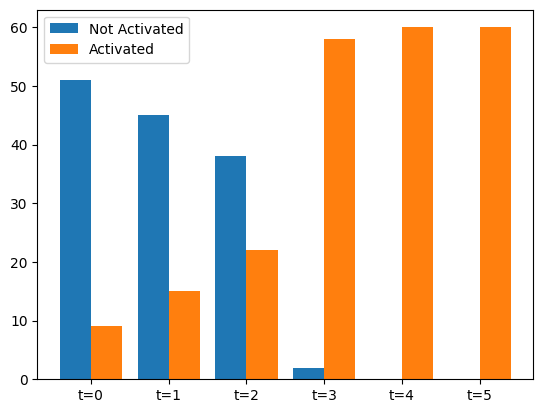

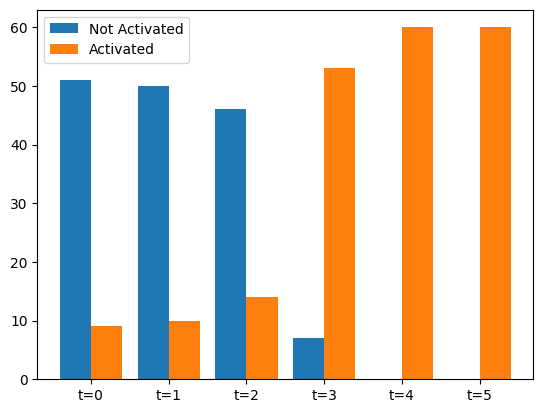

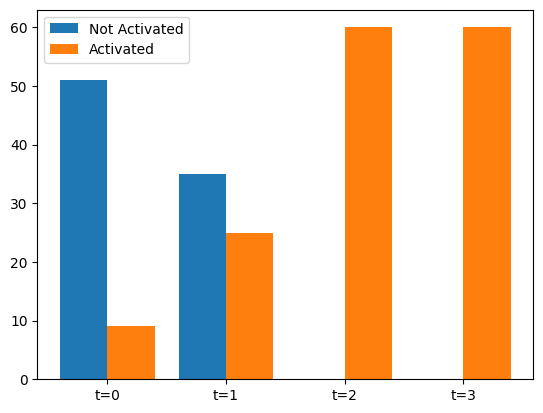

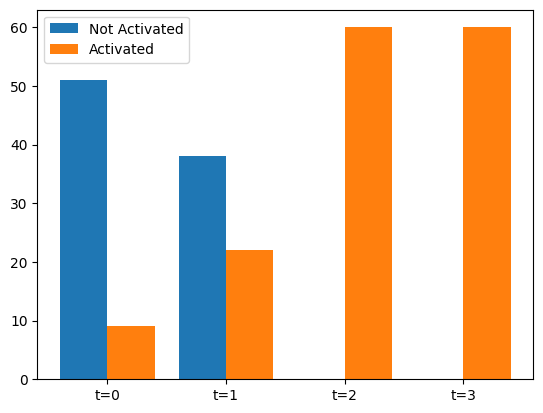

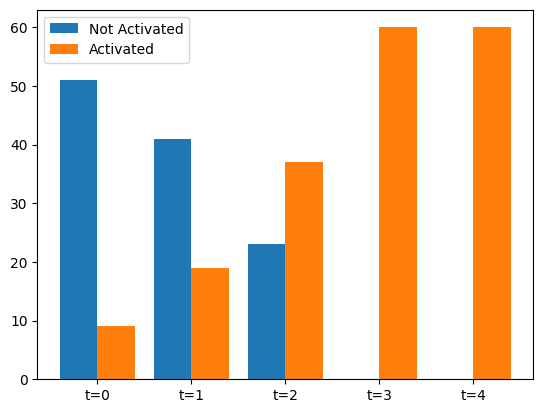

In [75]:
for i in range (5):
    ICM(s_graph,random.sample(list(s_graph.nodes()),round(0.15*len(s_graph))))

We can observe that, for a larger percentual of active nodes, is more likely that the propagation doesn't interrupt.

### CONLUSIONS
After these plots, we understood how much, taking several inputs and features, the outcome of a propagation can change. Not only changing the number of the inital oubreak, but also to which nodes. In conclusion, we affirm that the kind of active nodes plays a key role in a contagion scenario. 